In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import *
import numpy as np
from openpyxl import *
import scipy.stats as stats
from pymle.fit.AnalyticalMLE import AnalyticalMLE
from pymle.models import CEV, CIR, OrnsteinUhlenbeck, CKLS, BrownianMotion
from pymle.sim.Simulator1D import Simulator1D 
from pymle.TransitionDensity import ExactDensity, EulerDensity, OzakiDensity, ShojiOzakiDensity, KesslerDensity

In [2]:
data = pd.read_excel('Data_set.xlsx')

In [3]:
x = np.array(data['DGS10'])
N = len(x)
T = len(x)
t = np.linspace(0, T, N)
x0 = 4.06

In [4]:
def get_w(T, N):
    W = np.zeros(N+1)  
    delta = T / N
    sqrt_delta = np.sqrt(delta)    
    for i in range (1, N + 1):
        W[i] += W[i-1] + np.random.normal(0, sqrt_delta)
    return W

def get_params_CEV(x):    
    model = CEV()  # constant elasticity of variance
    aic = []
    params = []

    S0 = 4.06  # initial value of process
    T = len(x)  # num years of the sample
    freq = 1  # observations per year
    dt = 1. / freq

    param_bounds = [(0, 10), (0, 4), (0.01, 0.03), (0.01,2)]
    guess = np.array([1, 0.1, 0.4, 0.3])

    kessler_est = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess)
    kessler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess).aic
    ozaki_est = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess)
    ozaki_est_aic = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess).aic
    euler_est = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess)
    euler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess).aic
    aic.append(kessler_est_aic)
    aic.append(euler_est_aic)
    aic.append(ozaki_est_aic)
    params.append(kessler_est.params)
    params.append(ozaki_est.params)
    params.append(euler_est.params)

    return params, aic

def get_CEV(params, T, N, t, x0, w):
    x = np.zeros(N + 1)
    x[0] = x0 
    for i in range(1, N+1):
        dw = w[i] - w[i-1]
        dx = params[0] * (params[1] - x[i-1]) * T / N + params[2] * x[i-1] ** params[3] * dw
        x[i] = x[i-1] + dx
#         print(dx)
    return x


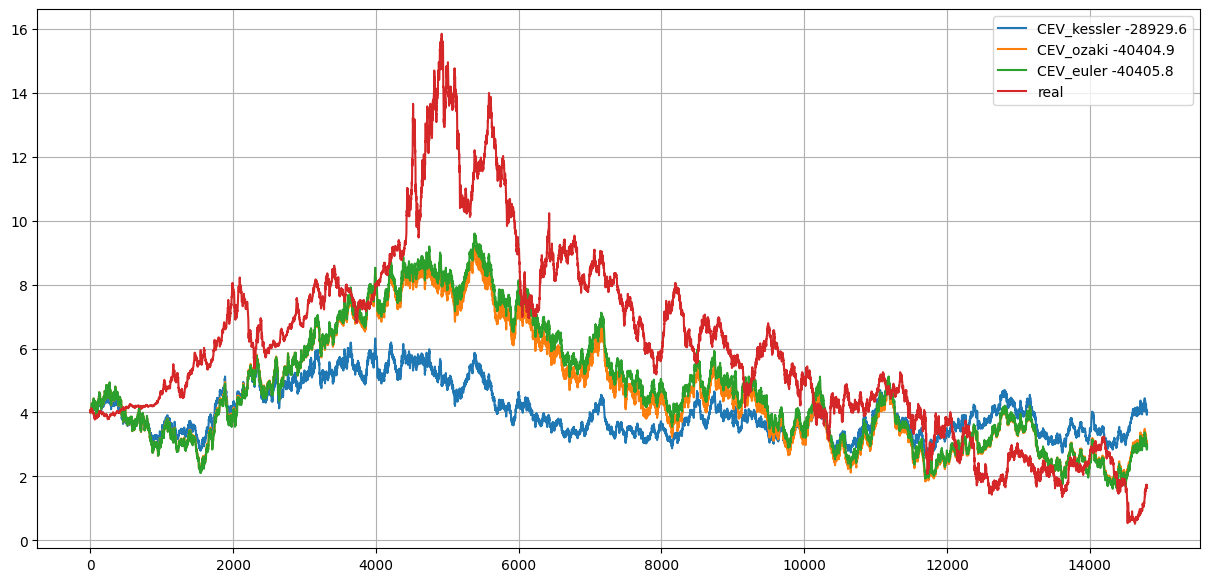

In [13]:
# paramsCEV, aic = get_params_CEV(x)
w = get_w(T, N)
x_kessler = get_CEV(paramsCEV[0], T, N, t, x0, w)
x_ozaki = get_CEV(paramsCEV[1], T, N, t, x0, w)
x_euler = get_CEV(paramsCEV[2], T, N, t, x0, w)
plt.figure(figsize=(15,7))
plt.plot(x_kessler, label='CEV_kessler {:.1f}'.format(aic[0]))
plt.plot(x_ozaki, label='CEV_ozaki {:.1f}'.format(aic[1]))
plt.plot(x_euler, label='CEV_euler {:.1f}'.format(aic[2]))
plt.plot(x, label = 'real')
plt.grid()
plt.legend()

In [15]:
def get_params_CIR(x):    
    model = CIR()  # Cox-Ingersol-Ross 
    aic = []
    params = []

    S0 = 4.06  # initial value of process
    T = len(x)  # num years of the sample
    freq = 1  # observations per year
    dt = 1. / freq

    param_bounds = [(0, 10), (0, 4), (0.01, 1)]
    guess = np.array([1, 0.1, 0.4])

    kessler_est = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess)
    kessler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess).aic
    ozaki_est = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess)
    ozaki_est_aic = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess).aic
    euler_est = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess)
    euler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess).aic
    aic.append(kessler_est_aic)
    aic.append(euler_est_aic)
    aic.append(ozaki_est_aic)
    params.append(kessler_est.params)
    params.append(ozaki_est.params)
    params.append(euler_est.params)

    return params, aic

def get_CIR(params, T, N, t, x0, w):
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N+1):
        dw = w[i] - w[i-1]
        dx = params[0] * (params[1] - x[i-1]) * T / N + params[2] * np.sqrt(x[i-1]) * dw
        x[i] = x[i-1] + dx
#         print(x[i])
    return x

Initial Params: [1.  0.1 0.4]
Initial Likelihood: -38234.80397010831
`xtol` termination condition is satisfied.
Number of iterations: 61, function evaluations: 232, CG iterations: 101, optimality: 1.60e-01, constraint violation: 0.00e+00, execution time: 0.22 s.
Final Params: [1.42286563e-04 2.79181654e+00 2.70943875e-02]
Final Likelihood: 20056.633877483157
Initial Params: [1.  0.1 0.4]
Initial Likelihood: -38234.80397010831
`xtol` termination condition is satisfied.
Number of iterations: 61, function evaluations: 232, CG iterations: 101, optimality: 1.60e-01, constraint violation: 0.00e+00, execution time: 0.22 s.
Final Params: [1.42286563e-04 2.79181654e+00 2.70943875e-02]
Final Likelihood: 20056.633877483157
Initial Params: [1.  0.1 0.4]
Initial Likelihood: -249964.3548891347
`gtol` termination condition is satisfied.
Number of iterations: 154, function evaluations: 608, CG iterations: 230, optimality: 5.89e-08, constraint violation: 0.00e+00, execution time: 0.63 s.
Final Params: 

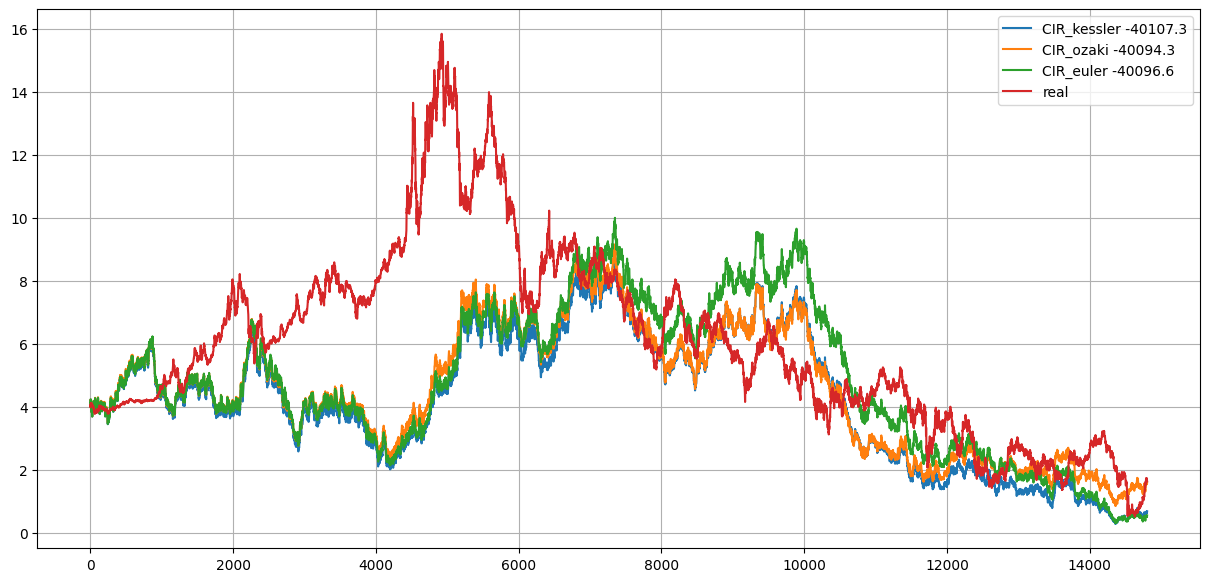

In [16]:
# paramsCIR, aic = get_params_CIR(x)
w = get_w(T, N)
x_kessler = get_CIR(paramsCIR[0], T, N, t, x0, w)
x_ozaki = get_CIR(paramsCIR[1], T, N, t, x0, w)
x_euler = get_CIR(paramsCIR[2], T, N, t, x0, w)
plt.figure(figsize=(15,7))
plt.plot(x_kessler, label='CIR_kessler {:.1f}'.format(aic[0]))
plt.plot(x_ozaki, label='CIR_ozaki {:.1f}'.format(aic[1]))
plt.plot(x_euler, label='CIR_euler {:.1f}'.format(aic[2]))
plt.plot(x, label = 'real')

plt.grid()
plt.legend()


In [13]:
def get_params_OU(x):    
    model = OrnsteinUhlenbeck() 
    aic = []
    params = []

    S0 = 4.06  # initial value of process
    T = len(x)  # num years of the sample
    freq = 1  # observations per year
    dt = 1. / freq

    param_bounds = [(0, 10), (0, 4), (0.01, 0.1)]
    guess = np.array([1, 0.1, 0.4])

    kessler_est = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess)
    kessler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess).aic
    ozaki_est = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess)
    ozaki_est_aic = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess).aic
    euler_est = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess)
    euler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess).aic
    aic.append(kessler_est_aic)
    aic.append(euler_est_aic)
    aic.append(ozaki_est_aic)
    params.append(kessler_est.params)
    params.append(ozaki_est.params)
    params.append(euler_est.params)

    return params, aic

def get_OU(params, T, N, t, x0, w):
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        dw = w[i] - w[i-1]
        dx = params[0] * (params[1] - x[i-1]) * T / N + params[2] * dw
        x[i] = x[i-1] + dx
    return x

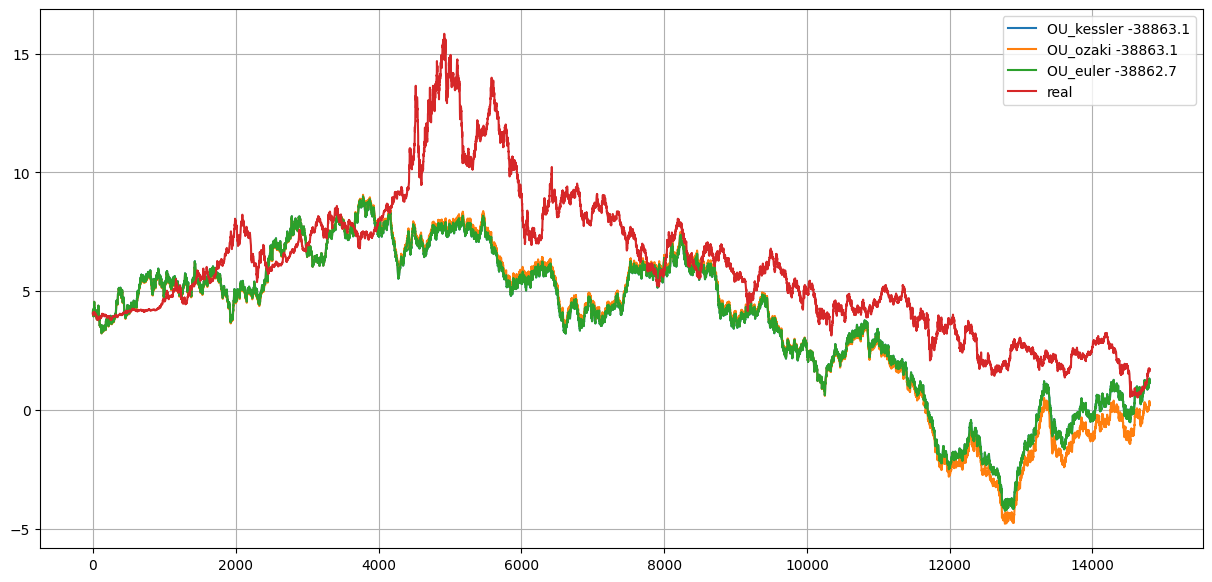

In [16]:
# paramsOU, aic = get_params_OU(x)
w = get_w(T, N)
x_kessler = get_OU(paramsOU[0], T, N, t, x0, w)
x_ozaki = get_OU(paramsOU[1], T, N, t, x0, w)
x_euler = get_OU(paramsOU[2], T, N, t, x0, w)
plt.figure(figsize=(15,7))
plt.plot(x_kessler, label='OU_kessler {:.1f}'.format(aic[0]))
plt.plot(x_ozaki, label='OU_ozaki {:.1f}'.format(aic[1]))
plt.plot(x_euler, label='OU_euler {:.1f}'.format(aic[2]))
plt.plot(x, label = 'real')
plt.grid()
plt.legend()


Initial Params: [0.0002 0.0006]
Initial Likelihood: -884740.9098444018
`gtol` termination condition is satisfied.
Number of iterations: 19, function evaluations: 45, CG iterations: 26, optimality: 7.55e-07, constraint violation: 0.00e+00, execution time: 0.037 s.
Final Params: [1.02716187e-05 6.50915159e-02]
Final Likelihood: 19434.044822571508
Initial Params: [0.0002 0.0006]
Initial Likelihood: -884740.9098444018
`gtol` termination condition is satisfied.
Number of iterations: 19, function evaluations: 45, CG iterations: 26, optimality: 7.55e-07, constraint violation: 0.00e+00, execution time: 0.031 s.
Final Params: [1.02716187e-05 6.50915159e-02]
Final Likelihood: 19434.044822571508

Euler MLE: 
params      | [1.02716187e-05 6.50915159e-02] 
sample size | 14801 
likelihood  | 19434.044822571508 
AIC         | -38864.089645143016
BIC         | -38848.88474509294

Euler AIC: -38864.089645143016
Initial Params: [0.0002 0.0006]
Initial Likelihood: -884740.9098444018
`gtol` termination co

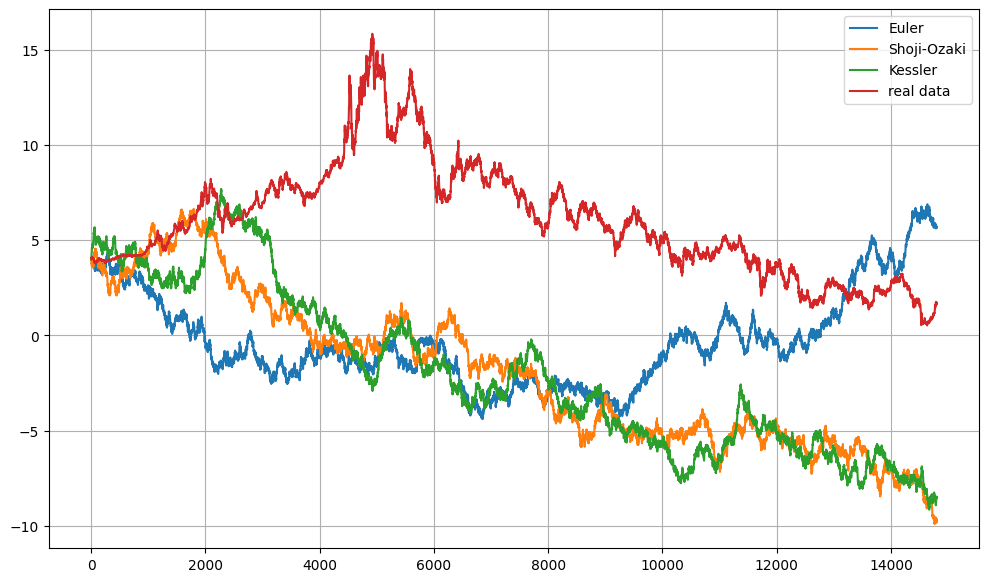

In [69]:
def euler_estimator(x):
    model = BrownianMotion()  

    param_bounds = [(0.00001, 1.0), (0.00003, 2.0)]
    guess = np.array([0.0002, 0.0006])

    euler_est = AnalyticalMLE(x, param_bounds, dt=1, density=EulerDensity(model)).estimate_params(guess)
    euler_est_aic = AnalyticalMLE(x, param_bounds, dt=1, density=EulerDensity(model)).estimate_params(guess).aic
    print(f'\nEuler MLE: {euler_est}')
    print(f'\nEuler AIC: {euler_est_aic}')
    return euler_est.params

def sod_estimator(x):
    model = BrownianMotion()  

    param_bounds = [(0.00001, 1.0), (0.00003, 2.0)]
    guess = np.array([0.0002, 0.0006])

    sod_est = AnalyticalMLE(x, param_bounds, dt=1, density=ShojiOzakiDensity(model)).estimate_params(guess)
    sod_est_aic = AnalyticalMLE(x, param_bounds, dt=1, density=ShojiOzakiDensity(model)).estimate_params(guess).aic
    print(f'\nShoji-Ozaki MLE: {sod_est}')
    print(f'\nShoji-Ozaki AIC: {sod_est_aic}')
    return sod_est.params

def kessler_estimator(x):
    model = BrownianMotion()  

    param_bounds = [(0.00001, 1.0), (0.00003, 2.0)]
    guess = np.array([0.0002, 0.0006])

    kessler_est = AnalyticalMLE(x, param_bounds, dt=1, density=KesslerDensity(model)).estimate_params(guess)
    kessler_est_aic = AnalyticalMLE(x, param_bounds, dt=1, density=KesslerDensity(model)).estimate_params(guess).aic
    print(f'\nKessler MLE: {kessler_est}')
    print(f'\nKessler AIC: {kessler_est_aic}')
    return kessler_est.params

def Black_Scholes_Merton_process(x0, N, mu, sigma, delta_w, delta):
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x[i] = x[i-1] + mu * delta + sigma * delta_w[i]
    return x

plt.figure(figsize=(12, 7))

mu_sigma = [euler_estimator(x), sod_estimator(x), kessler_estimator(x)]
est_legends = ['Euler', 'Shoji-Ozaki', 'Kessler']
for ms, est_legend in zip(mu_sigma, est_legends):
    bsm_x = Black_Scholes_Merton_process(x0=x[0], 
                                      N=len(x), 
                                      mu=ms[0], sigma=ms[1], 
                                      delta_w=np.random.normal(0, 1, len(x)), 
                                      delta=1)
    plt.plot( data.index, bsm_x, label = f'{est_legend}')
plt.plot( data.index, data['DGS10'], label='real data')
plt.legend()
plt.grid()
plt.show()

In [22]:
def get_params_CKLS(x):    
    model = CKLS()  # Chan-Karolyi-Longstaff-Sanders
    aic = []
    params = []

    S0 = 4.06  # initial value of process
    T = len(x)  # num years of the sample
    freq = 1  # observations per year
    dt = 1. / freq

    param_bounds = [(-1, 3), (-1, 5), (0.01, 1), (0.01, 2)]
    guess = np.array([0.01, 0.01, 0.01, 0.2])

    kessler_est = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess)
    kessler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=KesslerDensity(model)).estimate_params(guess).aic
    ozaki_est = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess)
    ozaki_est_aic = AnalyticalMLE(x, param_bounds, dt, density=OzakiDensity(model)).estimate_params(guess).aic
    euler_est = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess)
    euler_est_aic = AnalyticalMLE(x, param_bounds, dt, density=EulerDensity(model)).estimate_params(guess).aic
    aic.append(kessler_est_aic)
    aic.append(euler_est_aic)
    aic.append(ozaki_est_aic)
    params.append(kessler_est.params)
    params.append(ozaki_est.params)
    params.append(euler_est.params)

    return params, aic

def get_CKLS(params, T, N, t, x0, w):
    x = np.zeros(N+1)
    x[0] = x0 
    for i in range(1, N + 1):
        dw = w[i] - w[i-1]
        x[i] = x[i-1] + (params[0] + params[1] * x[i-1]) * T / N + params[2] * x[i-1] ** params[3] * dw
    return x

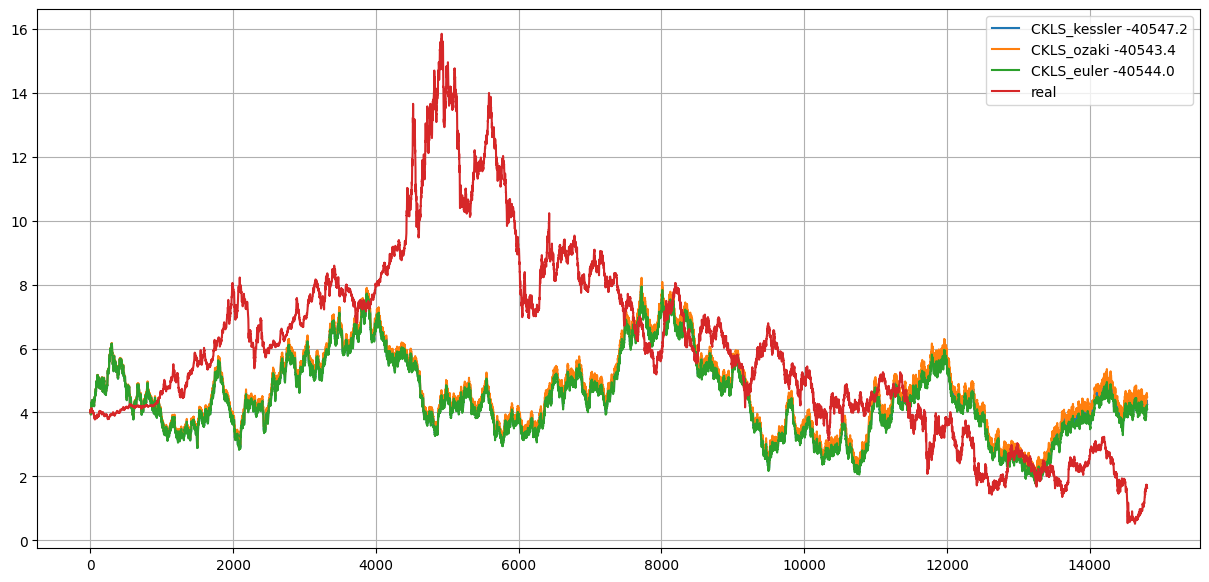

In [71]:
# paramsCKLS, aic = get_params_CKLS(x)
w = get_w(T, N)
x_kessler = get_CKLS(paramsCKLS[0], T, N, t, x0, w)
x_ozaki = get_CKLS(paramsCKLS[1], T, N, t, x0, w)
x_euler = get_CKLS(paramsCKLS[2], T, N, t, x0, w)
plt.figure(figsize=(15,7))
plt.plot(x_kessler, label='CKLS_kessler {:.1f}'.format(aic[0]))
plt.plot(x_ozaki, label='CKLS_ozaki {:.1f}'.format(aic[1]))
plt.plot(x_euler, label='CKLS_euler {:.1f}'.format(aic[2]))
plt.plot(x, label = 'real')
plt.grid()
plt.legend()

In [4]:
from pymle.models import *
list_model = [OrnsteinUhlenbeck(), BrownianMotion(), CEV(), CIR(), GeometricBM(), IGBM(), CKLS(), AitSahalia96(), Hyperbolic(), Hyperbolic2(), Jacobi(),  LinearSDE1(), LinearSDE2(),  Logistic(),  ModifiedCIR(),    NonLinearSDE(), Pearson(),  PeralVerhulst(), RadialOU(), Threehalf()]

param_bounds = [[(0, 10), (0, 4), (0.01, 0.1)],#OU
                [(0.01, 10), (0.01, 2)], # Brownian Motion
                [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2)], # CEV
                [(0.01, 10), (0.01, 10),(0.01, 2)],  # CIR
                [(0.01, 10), (0.01, 2)],# GBM
                [(0.01, 10), (0.01, 10),(0.01, 2)],# IGBM
                [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2)],  # CKLS
                [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2), (0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2)], #AitSahalia96
                [(0.01, 10), (0.01, 2)], # Hyperbolic
                [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2), (0.01, 10)],  # Hyperbolic2
                [(0.01, 2)], #Jacobi
                [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2)], #LinearSDE1
                [(0.01, 10), (0.01, 10),(0.01, 2)], #LinearSDE2 
                [(0.01, 10), (0.01, 2)],# Logistic
                [(0.01, 10), (0.01, 2)],# ModifiedCir
                [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2), (0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2)], #NonLinearSDE
                [(0.01, 10), (0.01, 10), (0.01, 10), (0.01, 2), (0.01, 10)], #Pearson
                [(0.01, 10), (0.01, 10),(0.01, 2)], #PeralVerhulst
                [(0.01, 10), (0.01, 10)], #RadialOU
                [(0.01, 10), (0.01, 10),(0.01, 2)]#Threehalf
               ]
             

guess  = [[1, 0.1, 0.4], #OU 
                [0.01, 0.2],                                     # Brownian Motion
                [0.01, 0.01, 0.01, 0.2],                         # CEV
                [0.01, 0.01, 0.2],                               # CIR
                [0.01, 0.2],                                     # GBM
                [0.01, 0.01, 0.2],                               # IGBM
                [0.01, 0.01, 0.01, 0.2], # CKLS
                [0.01, 0.01, 0.01, 0.2, 0.01, 0.01, 0.01, 0.2], #AitSahalia96
                [0.01, 0.2], # Hyperbolic
                [0.01, 0.01, 0.01, 0.2, 0.01],  # Hyperbolic2
                [0.1], #Jacobi
                [0.01, 0.01, 0.01, 0.2], #LinearSDE1
                [0.01, 0.01, 0.01], #LinearSDE2
                [0.01, 0.01], # Logistic
                [0.01, 0.01], # ModifiedCir
                [0.01, 0.01, 0.01, 0.2, 0.01, 0.01, 0.01, 0.2], #NonLinearSDE
                [0.01, 0.01, 0.01, 0.2, 0.01], #Pearson
                [0.01, 0.01, 0.01], #PeralVerhulst
                [0.01, 0.01], #RadialOU
                [0.01, 0.01, 0.01] #Threehalf
               ]

In [5]:
aic = []
for i in range(0, 20):
    print(i)
    S0 = 4.06
    T = len(x) 
    freq = 1 
    dt = 1. / freq
    kessler_est_aic = AnalyticalMLE(x, param_bounds[i], dt, density=KesslerDensity(list_model[i])).estimate_params(guess[i]).aic
    ozaki_est_aic = AnalyticalMLE(x, param_bounds[i], dt, density=OzakiDensity(list_model[i])).estimate_params(guess[i]).aic
    euler_est_aic = AnalyticalMLE(x, param_bounds[i], dt, density=EulerDensity(list_model[i])).estimate_params(guess[i]).aic
    aic.append(kessler_est_aic)
    aic.append(ozaki_est_aic)
    aic.append(euler_est_aic)

0
Initial Params: [1, 0.1, 0.4]
Initial Likelihood: -38152.641539219796
`xtol` termination condition is satisfied.
Number of iterations: 51, function evaluations: 220, CG iterations: 83, optimality: 9.10e-05, constraint violation: 0.00e+00, execution time: 0.16 s.
Final Params: [1.50718309e-04 3.99674603e+00 6.50892640e-02]
Final Likelihood: 19434.55905997462
Initial Params: [1, 0.1, 0.4]
Initial Likelihood: -794278.6814201156


C:\Users\Samunr1s\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 58, function evaluations: 248, CG iterations: 105, optimality: 5.56e-03, constraint violation: 0.00e+00, execution time: 0.21 s.
Final Params: [1.04326787e-04 3.34883991e+00 6.50909210e-02]
Final Likelihood: 19434.348042916958
Initial Params: [1, 0.1, 0.4]
Initial Likelihood: -818924.1130717442
`gtol` termination condition is satisfied.
Number of iterations: 51, function evaluations: 200, CG iterations: 93, optimality: 2.38e-07, constraint violation: 0.00e+00, execution time: 0.14 s.
Final Params: [1.50685855e-04 3.99778019e+00 6.50892541e-02]
Final Likelihood: 19434.559003044094
1
Initial Params: [0.01, 0.2]
Initial Likelihood: 9417.09506197411
`xtol` termination condition is satisfied.
Number of iterations: 126, function evaluations: 393, CG iterations: 134, optimality: 1.46e-04, constraint violation: 0.00e+00, execution time: 0.37 s.
Final Params: [0.01       0.06587999]
Final Likelihood: 19255.834513932445
Initial Par

C:\Users\Samunr1s\AppData\Local\Programs\Python\Python310\lib\site-packages\pymle\TransitionDensity.py:106: RuntimeWarning: invalid value encountered in divide
  temp = mu * (np.exp(mu_x * t) - 1) / mu_x


`gtol` termination condition is satisfied.
Number of iterations: 109, function evaluations: 324, CG iterations: 117, optimality: 4.86e-07, constraint violation: 0.00e+00, execution time: 0.28 s.
Final Params: [0.01000058 0.06588012]
Final Likelihood: 19255.814676085214
2
Initial Params: [0.01, 0.01, 0.01, 0.2]
Initial Likelihood: -155247.7910887205
`xtol` termination condition is satisfied.
Number of iterations: 186, function evaluations: 1085, CG iterations: 500, optimality: 2.85e+02, constraint violation: 0.00e+00, execution time:  2.6 s.
Final Params: [0.01000093 4.56339577 0.03245365 0.44660614]
Final Likelihood: 18759.273811383893
Initial Params: [0.01, 0.01, 0.01, 0.2]
Initial Likelihood: -191529.4463900681
The maximum number of function evaluations is exceeded.
Number of iterations: 250, function evaluations: 1250, CG iterations: 746, optimality: 5.00e+02, constraint violation: 0.00e+00, execution time:  1.4 s.
Final Params: [0.01000553 0.01004567 0.0957782  0.13372593]
Final Li

C:\Users\Samunr1s\AppData\Local\Programs\Python\Python310\lib\site-packages\pymle\models\AitSahalia96.py:26: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self._params[4] + self._params[5] * x + self._params[6] * x ** self._params[7])


The maximum number of function evaluations is exceeded.
Number of iterations: 250, function evaluations: 27, CG iterations: 1985, optimality: 8.35e+04, constraint violation: 0.00e+00, execution time: 0.56 s.
Final Params: [0.01 0.01 0.01 0.2  0.01 0.01 0.01 0.2 ]
Final Likelihood: -58704.30759036264
Initial Params: [0.01, 0.01, 0.01, 0.2, 0.01, 0.01, 0.01, 0.2]
Initial Likelihood: -890379.9070952473
`gtol` termination condition is satisfied.
Number of iterations: 102, function evaluations: 972, CG iterations: 467, optimality: 4.17e-07, constraint violation: 0.00e+00, execution time:  1.1 s.
Final Params: [0.01000013 0.01000002 0.01       0.01       0.01000004 0.05553876
 0.01000004 0.01000825]
Final Likelihood: -12736.997676939116
Initial Params: [0.01, 0.01, 0.01, 0.2, 0.01, 0.01, 0.01, 0.2]
Initial Likelihood: -863953.7252135442
`xtol` termination condition is satisfied.
Number of iterations: 83, function evaluations: 783, CG iterations: 293, optimality: 2.61e-05, constraint violatio

C:\Users\Samunr1s\AppData\Local\Programs\Python\Python310\lib\site-packages\pymle\models\Jacobi.py:26: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self._params[0] * np.abs(x * (1 - x)))


The maximum number of function evaluations is exceeded.
Number of iterations: 250, function evaluations: 6, CG iterations: 249, optimality: 3.51e+04, constraint violation: 0.00e+00, execution time: 0.16 s.
Final Params: [0.1]
Final Likelihood: -19148.999261078963
Initial Params: [0.1]
Initial Likelihood: -19796.343606619303
The maximum number of function evaluations is exceeded.
Number of iterations: 250, function evaluations: 6, CG iterations: 249, optimality: 3.82e+04, constraint violation: 0.00e+00, execution time: 0.16 s.
Final Params: [0.1]
Final Likelihood: -19796.343606619303
11
Initial Params: [0.01, 0.01, 0.01, 0.2]
Initial Likelihood: 3129.4449697190535
`xtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 280, CG iterations: 72, optimality: 3.86e-03, constraint violation: 0.00e+00, execution time: 0.18 s.
Final Params: [0.01000025 0.01000006 0.01905383 0.19305244]
Final Likelihood: 12668.559560086704
Initial Params: [0.01, 0.01, 0.01, 0.2

C:\Users\Samunr1s\AppData\Local\Programs\Python\Python310\lib\site-packages\pymle\models\Pearson.py:29: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * self._params[0] * (a * x * x + b * x + c))


The maximum number of function evaluations is exceeded.
Number of iterations: 250, function evaluations: 18, CG iterations: 1241, optimality: 3.58e+05, constraint violation: 0.00e+00, execution time: 0.38 s.
Final Params: [0.01 0.01 0.01 0.2  0.01]
Final Likelihood: 11086.598797566614
Initial Params: [0.01, 0.01, 0.01, 0.2, 0.01]
Initial Likelihood: 11236.042463347441
The maximum number of function evaluations is exceeded.
Number of iterations: 250, function evaluations: 18, CG iterations: 1241, optimality: 3.52e+05, constraint violation: 0.00e+00, execution time: 0.37 s.
Final Params: [0.01 0.01 0.01 0.2  0.01]
Final Likelihood: 11236.042463347441
Initial Params: [0.01, 0.01, 0.01, 0.2, 0.01]
Initial Likelihood: 11173.125570551609
The maximum number of function evaluations is exceeded.
Number of iterations: 250, function evaluations: 18, CG iterations: 1241, optimality: 3.56e+05, constraint violation: 0.00e+00, execution time: 0.36 s.
Final Params: [0.01 0.01 0.01 0.2  0.01]
Final Lik